In [250]:
import pandas as pd
import numpy as np

In [316]:
import matplotlib.pyplot as plt
import seaborn as sns

In [542]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [417]:
import warnings
warnings.filterwarnings("ignore")

In [252]:
data = pd.read_csv("E:\dating App\dating_app_sample_data.csv")

In [254]:
data.head()

,User_ID,Age,Gender,Location,Interests,Likes_Given,Likes_Received,Messages_Sent,Messages_Received
0,1,56,Female,San Antonio,"['Music', 'Books']",227,149,142,52
1,2,69,Male,Los Angeles,"['Travel', 'Sports', 'Movies', 'Books', 'Music']",190,169,26,192
2,3,46,Male,New York,"['Books', 'Music', 'Sports', 'Movies', 'Travel']",225,159,122,154
3,4,32,Male,Phoenix,"['Travel', 'Movies', 'Sports', 'Music', 'Books']",167,141,88,12
4,5,60,Female,Chicago,"['Travel', 'Music', 'Books']",296,153,59,134


In [256]:
data.columns

Index(['User_ID', 'Age', 'Gender', 'Location', 'Interests', 'Likes_Given',
       'Likes_Received', 'Messages_Sent', 'Messages_Received'],
      dtype='object')

In [266]:
data2 = data[data["Interests"].map(data["Interests"].value_counts()) > 300] = data[data["Interests"].map(data["Interests"].value_counts()) > 300]

In [268]:
data2["Interests"].value_counts()

Interests
['Travel']    642
['Movies']    610
['Books']     580
['Music']     574
['Sports']    556
Name: count, dtype: int64

In [425]:
data2['Interests'] = data2['Interests'].str.replace(r"\[|\]", "")

In [272]:
data2

,User_ID,Age,Gender,Location,Interests,Likes_Given,Likes_Received,Messages_Sent,Messages_Received
12,13,41,Female,Phoenix,['Travel'],9,153,125,128
17,18,20,Female,San Diego,['Books'],41,41,58,174
22,23,61,Female,San Antonio,['Music'],177,205,183,6
26,27,38,Female,Chicago,['Travel'],205,260,101,57
28,29,29,Female,Houston,['Sports'],15,10,114,95
...,...,...,...,...,...,...,...,...,...
14971,14972,48,Male,Phoenix,['Music'],1,280,198,26
14973,14974,56,Female,Phoenix,['Movies'],299,110,167,52
14981,14982,62,Female,San Diego,['Sports'],28,111,66,10
14984,14985,22,Male,Phoenix,['Music'],268,142,86,161


In [443]:
data2['Interests'] = data2['Interests'].str.replace(r"\[|\]", "")

In [445]:
data2

,User_ID,Age,Gender,Location,Interests,Likes_Given,Likes_Received,Messages_Sent,Messages_Received
12,13,41,Female,Phoenix,['Travel'],9,153,125,128
17,18,20,Female,San Diego,['Books'],41,41,58,174
22,23,61,Female,San Antonio,['Music'],177,205,183,6
26,27,38,Female,Chicago,['Travel'],205,260,101,57
28,29,29,Female,Houston,['Sports'],15,10,114,95
...,...,...,...,...,...,...,...,...,...
14971,14972,48,Male,Phoenix,['Music'],1,280,198,26
14973,14974,56,Female,Phoenix,['Movies'],299,110,167,52
14981,14982,62,Female,San Diego,['Sports'],28,111,66,10
14984,14985,22,Male,Phoenix,['Music'],268,142,86,161


In [447]:
data2['Interests'] = data2['Interests'].apply(lambda x: x.replace('[', '').replace(']', ''))

In [449]:
data2['Interests'] = data2['Interests'].apply(lambda x: x.replace(''' , ' ').replace('', ''))

In [451]:
data2

,User_ID,Age,Gender,Location,Interests,Likes_Given,Likes_Received,Messages_Sent,Messages_Received
12,13,41,Female,Phoenix,'Travel',9,153,125,128
17,18,20,Female,San Diego,'Books',41,41,58,174
22,23,61,Female,San Antonio,'Music',177,205,183,6
26,27,38,Female,Chicago,'Travel',205,260,101,57
28,29,29,Female,Houston,'Sports',15,10,114,95
...,...,...,...,...,...,...,...,...,...
14971,14972,48,Male,Phoenix,'Music',1,280,198,26
14973,14974,56,Female,Phoenix,'Movies',299,110,167,52
14981,14982,62,Female,San Diego,'Sports',28,111,66,10
14984,14985,22,Male,Phoenix,'Music',268,142,86,161


In [284]:
data2

,User_ID,Age,Gender,Location,Interests,Likes_Given,Likes_Received,Messages_Sent,Messages_Received
12,13,41,Female,Phoenix,'Travel',9,153,125,128
17,18,20,Female,San Diego,'Books',41,41,58,174
22,23,61,Female,San Antonio,'Music',177,205,183,6
26,27,38,Female,Chicago,'Travel',205,260,101,57
28,29,29,Female,Houston,'Sports',15,10,114,95
...,...,...,...,...,...,...,...,...,...
14971,14972,48,Male,Phoenix,'Music',1,280,198,26
14973,14974,56,Female,Phoenix,'Movies',299,110,167,52
14981,14982,62,Female,San Diego,'Sports',28,111,66,10
14984,14985,22,Male,Phoenix,'Music',268,142,86,161


In [241]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2962 entries, 12 to 14992
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User_ID            2962 non-null   int64 
 1   Age                2962 non-null   int64 
 2   Gender             2962 non-null   object
 3   Location           2962 non-null   object
 4   Interests          2962 non-null   object
 5   Likes_Given        2962 non-null   int64 
 6   Likes_Received     2962 non-null   int64 
 7   Messages_Sent      2962 non-null   int64 
 8   Messages_Received  2962 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 231.4+ KB


In [429]:
data2["Interests"] = data["Interests"].astype(str)

In [245]:
data2["Interests"].value_counts()

Interests
['Travel']    642
['Movies']    610
['Books']     580
['Music']     574
['Sports']    556
Name: count, dtype: int64

In [288]:
data2.head()

,User_ID,Age,Gender,Location,Interests,Likes_Given,Likes_Received,Messages_Sent,Messages_Received
12,13,41,Female,Phoenix,'Travel',9,153,125,128
17,18,20,Female,San Diego,'Books',41,41,58,174
22,23,61,Female,San Antonio,'Music',177,205,183,6
26,27,38,Female,Chicago,'Travel',205,260,101,57
28,29,29,Female,Houston,'Sports',15,10,114,95


In [286]:
data2

,User_ID,Age,Gender,Location,Interests,Likes_Given,Likes_Received,Messages_Sent,Messages_Received
12,13,41,Female,Phoenix,'Travel',9,153,125,128
17,18,20,Female,San Diego,'Books',41,41,58,174
22,23,61,Female,San Antonio,'Music',177,205,183,6
26,27,38,Female,Chicago,'Travel',205,260,101,57
28,29,29,Female,Houston,'Sports',15,10,114,95
...,...,...,...,...,...,...,...,...,...
14971,14972,48,Male,Phoenix,'Music',1,280,198,26
14973,14974,56,Female,Phoenix,'Movies',299,110,167,52
14981,14982,62,Female,San Diego,'Sports',28,111,66,10
14984,14985,22,Male,Phoenix,'Music',268,142,86,161


In [314]:
#data2["Interests"].value_counts()

In [427]:
data2['Interests'] = data2['Interests'].str.replace("'", "")

In [312]:
#data2

In [310]:
#data2.isnull().sum()

In [306]:
data2.to_csv("E:\dating App\Cleaned.csv")

In [441]:
data2.head()

,User_ID,Age,Gender,Location,Interests,Likes_Given,Likes_Received,Messages_Sent,Messages_Received
12,13,41,Female,Phoenix,['Travel'],9,153,125,128
17,18,20,Female,San Diego,['Books'],41,41,58,174
22,23,61,Female,San Antonio,['Music'],177,205,183,6
26,27,38,Female,Chicago,['Travel'],205,260,101,57
28,29,29,Female,Houston,['Sports'],15,10,114,95


<Axes: xlabel='Gender', ylabel='count'>

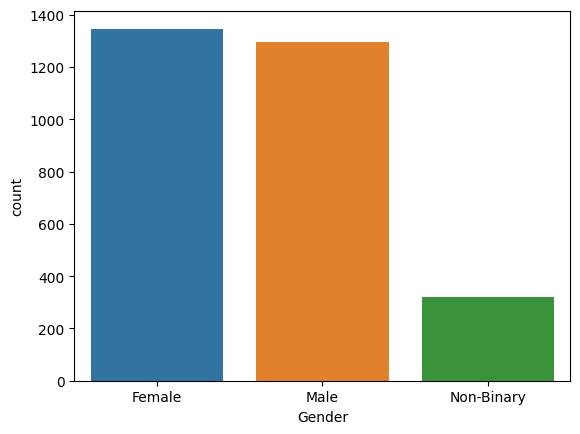

In [318]:
sns.countplot(data = data2 , x = "Gender" )

In [320]:
data2["Gender"].value_counts()

Gender
Female        1346
Male          1295
Non-Binary     321
Name: count, dtype: int64

In [364]:
a = data2.groupby("Interests")["Interests"].count()

In [366]:
a

Interests
Books     580
Movies    610
Music     574
Sports    556
Travel    642
Name: Interests, dtype: int64

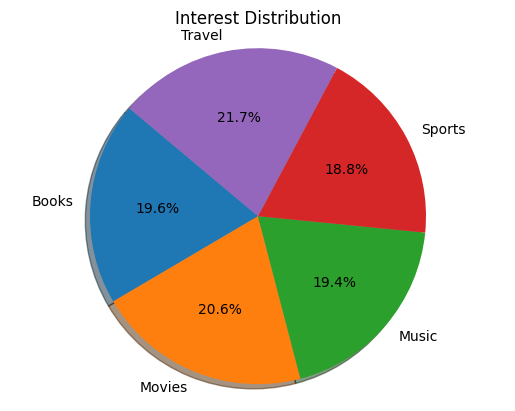

In [390]:
a = data2.groupby("Interests")["Interests"].count()

labels = a.index
sizes = a.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Interest Distribution')
plt.show()

In [392]:
data2.head()

,User_ID,Age,Gender,Location,Interests,Likes_Given,Likes_Received,Messages_Sent,Messages_Received
12,13,41,Female,Phoenix,Travel,9,153,125,128
17,18,20,Female,San Diego,Books,41,41,58,174
22,23,61,Female,San Antonio,Music,177,205,183,6
26,27,38,Female,Chicago,Travel,205,260,101,57
28,29,29,Female,Houston,Sports,15,10,114,95


Text(0, 0.5, 'Cities Contribution')

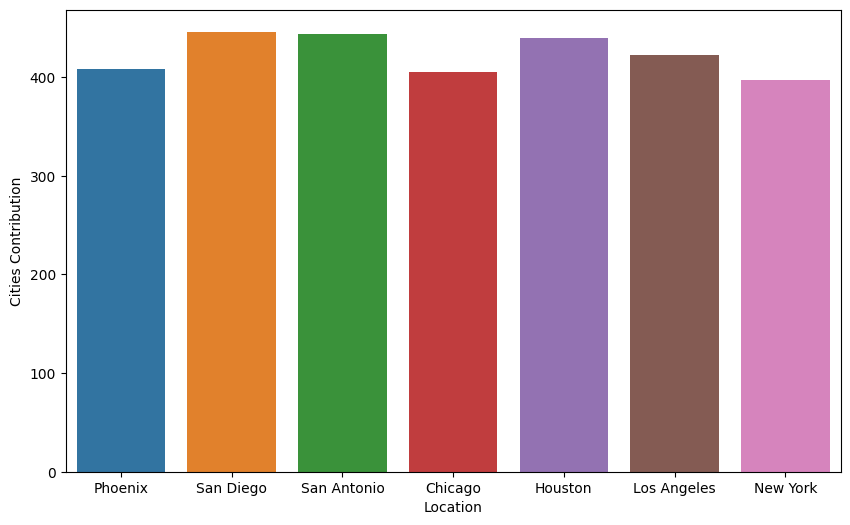

In [413]:
plt.figure(figsize= (10,6))
sns.countplot(data = data2 , x = "Location" )
plt.xlabel("Location")
plt.ylabel("Cities Contribution")

In [433]:
data2.columns

Index(['User_ID', 'Age', 'Gender', 'Location', 'Interests', 'Likes_Given',
       'Likes_Received', 'Messages_Sent', 'Messages_Received'],
      dtype='object')

In [435]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [459]:
data2

,User_ID,Age,Gender,Location,Interests,Likes_Given,Likes_Received,Messages_Sent,Messages_Received
12,13,41,Female,Phoenix,'Travel',9,153,125,128
17,18,20,Female,San Diego,'Books',41,41,58,174
22,23,61,Female,San Antonio,'Music',177,205,183,6
26,27,38,Female,Chicago,'Travel',205,260,101,57
28,29,29,Female,Houston,'Sports',15,10,114,95
...,...,...,...,...,...,...,...,...,...
14971,14972,48,Male,Phoenix,'Music',1,280,198,26
14973,14974,56,Female,Phoenix,'Movies',299,110,167,52
14981,14982,62,Female,San Diego,'Sports',28,111,66,10
14984,14985,22,Male,Phoenix,'Music',268,142,86,161


In [493]:
data2['Interests'] = data2['Interests'].str.strip().str.replace(',', '')

In [501]:
data2['Interests'] = data2['Interests'].str.replace(',', '')

In [503]:
data2["Interests"].value_counts()

Interests
'Travel'    642
'Movies'    610
'Books'     580
'Music'     574
'Sports'    556
Name: count, dtype: int64

In [505]:
data2

,User_ID,Age,Gender,Location,Interests,Likes_Given,Likes_Received,Messages_Sent,Messages_Received
12,13,41,Female,Phoenix,'Travel',9,153,125,128
17,18,20,Female,San Diego,'Books',41,41,58,174
22,23,61,Female,San Antonio,'Music',177,205,183,6
26,27,38,Female,Chicago,'Travel',205,260,101,57
28,29,29,Female,Houston,'Sports',15,10,114,95
...,...,...,...,...,...,...,...,...,...
14971,14972,48,Male,Phoenix,'Music',1,280,198,26
14973,14974,56,Female,Phoenix,'Movies',299,110,167,52
14981,14982,62,Female,San Diego,'Sports',28,111,66,10
14984,14985,22,Male,Phoenix,'Music',268,142,86,161


In [507]:
data2.columns

Index(['User_ID', 'Age', 'Gender', 'Location', 'Interests', 'Likes_Given',
       'Likes_Received', 'Messages_Sent', 'Messages_Received'],
      dtype='object')

In [512]:
#Cleaning Part Done

In [514]:
ndata = pd.read_csv("E:\dating App\Cleaned.csv")

In [516]:
ndata.head()

,Unnamed: 0,User_ID,Age,Gender,Location,Interests,Likes_Given,Likes_Received,Messages_Sent,Messages_Received
0,12,13,41,Female,Phoenix,Travel,9,153,125,128
1,17,18,20,Female,San Diego,Books,41,41,58,174
2,22,23,61,Female,San Antonio,Music,177,205,183,6
3,26,27,38,Female,Chicago,Travel,205,260,101,57
4,28,29,29,Female,Houston,Sports,15,10,114,95


In [518]:
ndata.drop(["Unnamed: 0"],axis = 1 ,inplace = True)

In [522]:
ndata.head()

,User_ID,Age,Gender,Location,Interests,Likes_Given,Likes_Received,Messages_Sent,Messages_Received
0,13,41,Female,Phoenix,Travel,9,153,125,128
1,18,20,Female,San Diego,Books,41,41,58,174
2,23,61,Female,San Antonio,Music,177,205,183,6
3,27,38,Female,Chicago,Travel,205,260,101,57
4,29,29,Female,Houston,Sports,15,10,114,95


In [524]:
ndata = pd.get_dummies(ndata, columns=["Gender", "Location","Interests"], dtype=int)


In [526]:
ndata

,User_ID,Age,Likes_Given,Likes_Received,Messages_Sent,Messages_Received,Gender_Female,Gender_Male,Gender_Non-Binary,Location_Chicago,...,Location_Los Angeles,Location_New York,Location_Phoenix,Location_San Antonio,Location_San Diego,Interests_Books,Interests_Movies,Interests_Music,Interests_Sports,Interests_Travel
0,13,41,9,153,125,128,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,18,20,41,41,58,174,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
2,23,61,177,205,183,6,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,27,38,205,260,101,57,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,29,29,15,10,114,95,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2957,14972,48,1,280,198,26,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2958,14974,56,299,110,167,52,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2959,14982,62,28,111,66,10,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2960,14985,22,268,142,86,161,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0


In [528]:
ndata.drop(["User_ID"],axis = 1 ,inplace = True)

In [530]:
ndata

,Age,Likes_Given,Likes_Received,Messages_Sent,Messages_Received,Gender_Female,Gender_Male,Gender_Non-Binary,Location_Chicago,Location_Houston,Location_Los Angeles,Location_New York,Location_Phoenix,Location_San Antonio,Location_San Diego,Interests_Books,Interests_Movies,Interests_Music,Interests_Sports,Interests_Travel
0,41,9,153,125,128,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,20,41,41,58,174,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0
2,61,177,205,183,6,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,38,205,260,101,57,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,29,15,10,114,95,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2957,48,1,280,198,26,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
2958,56,299,110,167,52,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2959,62,28,111,66,10,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2960,22,268,142,86,161,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0


In [532]:
X = ndata.drop(["Likes_Received"],axis = 1)
y = ndata["Likes_Received"]

In [540]:
#y

In [544]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [546]:
model = RandomForestRegressor(random_state=42)

In [548]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [554]:
predictions = model.predict(X_test)

In [559]:
mae = mean_absolute_error(y_test, predictions)
mae

72.77858347386172

In [563]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
r2

-0.030134822229377578

In [567]:
predictions = pd.DataFrame(predictions)

In [571]:
predictions.rename(columns = {0:"Predictions"},inplace = True)

In [581]:
X_test.reset_index(inplace = True)

In [585]:
X_test.drop(["index"],axis = 1,inplace = True)

In [587]:
X_test

,Age,Likes_Given,Messages_Sent,Messages_Received,Gender_Female,Gender_Male,Gender_Non-Binary,Location_Chicago,Location_Houston,Location_Los Angeles,Location_New York,Location_Phoenix,Location_San Antonio,Location_San Diego,Interests_Books,Interests_Movies,Interests_Music,Interests_Sports,Interests_Travel
0,22,108,174,106,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0
1,33,274,18,163,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
2,49,298,131,133,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
3,58,0,88,30,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,62,110,147,45,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,35,281,26,165,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
589,24,208,194,143,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
590,53,22,7,157,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
591,49,247,103,37,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [599]:
y_test = pd.DataFrame(y_test)
y_test.reset_index()
#y_test.drop(["index"],axis = 1,inplace = True)

,index,Likes_Received
0,1750,63
1,1583,7
2,2741,282
3,736,230
4,2688,49
...,...,...
588,509,67
589,811,188
590,2921,104
591,2749,282


In [607]:
y_test.reset_index(inplace = True)

,level_0,index,Likes_Received
0,0,1750,63
1,1,1583,7
2,2,2741,282
3,3,736,230
4,4,2688,49
...,...,...,...
588,588,509,67
589,589,811,188
590,590,2921,104
591,591,2749,282


In [609]:
y_test.drop(["level_0","index"],axis =1,inplace = True)

In [611]:
y_test

,Likes_Received
0,63
1,7
2,282
3,230
4,49
...,...
588,67
589,188
590,104
591,282


In [613]:
Final  = pd.concat([X_test,y_test,predictions],axis = 1)

In [615]:
Final

,Age,Likes_Given,Messages_Sent,Messages_Received,Gender_Female,Gender_Male,Gender_Non-Binary,Location_Chicago,Location_Houston,Location_Los Angeles,...,Location_Phoenix,Location_San Antonio,Location_San Diego,Interests_Books,Interests_Movies,Interests_Music,Interests_Sports,Interests_Travel,Likes_Received,Predictions
0,22,108,174,106,0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,63,154.14
1,33,274,18,163,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,7,131.04
2,49,298,131,133,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,282,205.09
3,58,0,88,30,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,230,183.07
4,62,110,147,45,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,49,145.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,35,281,26,165,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,67,128.82
589,24,208,194,143,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,188,139.24
590,53,22,7,157,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,104,143.80
591,49,247,103,37,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,282,177.38
